# Пояснения:
## Регрессионный анализ:

* Используем statsmodels.OLS для линейной регрессии.

* Возрастная группа (категориальная переменная) рассматривается как числовая для оценки общего тренда.

* Выводим summary модели и проверяем значимость коэффициента.

## Попарное сравнение:

* Сначала проводим ANOVA для проверки наличия значимых различий между группами.

* Если ANOVA значима (p < 0.05), выполняем post-hoc тесты:

- Тест Тьюки (Tukey HSD) для всех попарных сравнений.

- Альтернативно — попарные t-тесты с поправкой Бонферрони.

## Интерпретация:

* Регрессия показывает, есть ли общая тенденция изменения IgA с возрастом.

* Post-hoc тесты выявляют, между какими конкретно группами есть различия.

Для более точного анализа можно преобразовать возрастные группы в категории (например, строки), если номера групп не отражают равные интервалы.

Регрессионный анализ:
                            OLS Regression Results                            
Dep. Variable:                    IgA   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     85.92
Date:                Fri, 02 May 2025   Prob (F-statistic):           4.71e-09
Time:                        14:45:04   Log-Likelihood:                -34.478
No. Observations:                  24   AIC:                             72.96
Df Residuals:                      22   BIC:                             75.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8871      0.6

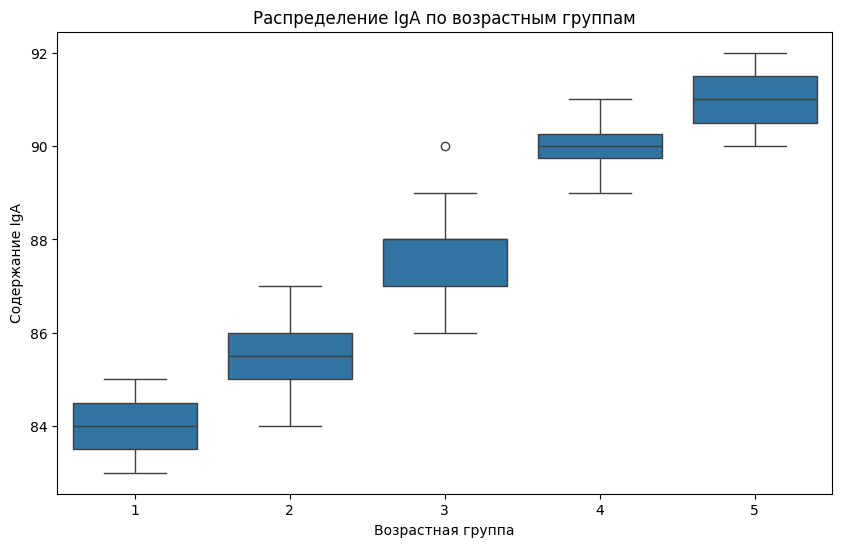

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats

# Подготовка данных
data = {
    'Age_Group': [1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5],
    'IgA': [83, 85, 84, 85, 85, 86, 86, 87, 86, 87, 87, 87, 88, 88, 88, 88, 89, 90, 89, 90, 90, 91, 90, 92]
}

df = pd.DataFrame(data)

# a) Регрессионный анализ
X = sm.add_constant(df['Age_Group'])  # Добавляем константу для intercept
model = sm.OLS(df['IgA'], X).fit()
print("Регрессионный анализ:")
print(model.summary())

# Проверка значимости коэффициента с использованием iloc для доступа по позиции
if model.pvalues.iloc[1] < 0.05:
    print(f"\nВывод: Возраст оказывает статистически значимое влияние на содержание IgA (p = {model.pvalues.iloc[1]:.3f})")
else:
    print(f"\nВывод: Возраст не оказывает статистически значимого влияния на содержание IgA (p = {model.pvalues.iloc[1]:.3f})")
print()
print(model.pvalues.iloc[1])
print()
# b) Попарное сравнение средних с поправкой на множественность гипотез
print("\nПопарное сравнение средних:")
# ANOVA для проверки общих различий
anova_model = ols('IgA ~ C(Age_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA таблица:")
print(anova_table)

# Если ANOVA значима, проводим post-hoc тесты
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("\nANOVA значима, проводим post-hoc анализ...")
    mc = MultiComparison(df['IgA'], df['Age_Group'])
    tukey_result = mc.tukeyhsd()
    print(tukey_result)
    
    # Альтернатива: тест Бонферрони
    print("\nПопарные t-тесты с поправкой Бонферрони:")
    bonferroni = mc.allpairtest(stats.ttest_ind, method='bonf')
    print(bonferroni[0])
else:
    print("\nANOVA не значима, нет оснований для post-hoc анализа")

# Дополнительно: визуализация средних значений по группам
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='IgA', data=df)
plt.title('Распределение IgA по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Содержание IgA')
plt.show()